<a href="https://colab.research.google.com/github/chin0104/DPDM2023/blob/main/DPDM_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

#HW1


In [ ]:
def find_max (list_ex):
  max = list_ex[0]
  for x in list_ex:
    if x > max:
      max = x
  return max

In [ ]:
def sort_max2min(list_ex):
  Ans = []
  print(list_ex)
  max = find_max(list_ex)
  Ans.append(max)
  list_ex.remove(max)
  list2 = list_ex
  print(list2)
  max = find_max(list2)
  Ans.append(max)
  list2.remove(max)
  list3 = list2
  print(list3)
  max = find_max(list3)
  Ans.append(max)
  list3.remove(max)
  list4 = list3
  print(list4)
  max = find_max(list4)
  Ans.append(max)
  list4.remove(max)
  list5 = list4
  print(list5)
  max = find_max(list5)
  Ans.append(max)
  list5.remove(max)
  list6 = list5
  print(list6)
  max = list5[0]
  Ans.append(max)
  return Ans

In [ ]:
list_ex = [1,5,9,-19,-2,0]
Ans = sort_max2min(list_ex)
print(Ans)

[1, 5, 9, -19, -2, 0]
[1, 5, -19, -2, 0]
[1, -19, -2, 0]
[-19, -2, 0]
[-19, -2]
[-19]
[9, 5, 1, 0, -2, -19]


#HW2

In [109]:
list = [1,5,9,-19,-2,0]

In [110]:
list.sort()

In [ ]:
def msort(list,x):
  if x == 0:
    list.sort(reverse=False)
  else:
    list.sort(reverse=True)
  return list

In [ ]:
list

[-19, -2, 0, 1, 5, 9]

In [ ]:
list.sort(reverse = True)

In [ ]:
list

[9, 5, 1, 0, -2, -19]

In [ ]:
sort(list,0)

[-19, -2, 0, 1, 5, 9]

In [ ]:
sort(list,1)

[9, 5, 1, 0, -2, -19]

#HW3

จำนวนเด็กที่ได้รับเงินอุดหนุนเพื่อการเลี้ยงดูเด็กแรกเกิดใน กทม. ปี 2565

number_of_register = จำนวนผู้ลงทะเบียน

number_of_eligible = จำนวนผู้มีสิทธิ

number_of_payee = จำนวนผู้ได้รับเงิน

form https://data.bangkok.go.th/dataset/soc_626208de02ea4/resource/419fec15-a47c-4e8d-a08d-fa33604263ab

In [ ]:
data = pd.read_csv('/content/10.-2565.csv')
data

FileNotFoundError: ignored

In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data.describe()

In [ ]:
out1 = filter(data,'number_of_register')
out1

In [ ]:
out2 = filter(data,'number_of_eligible')
out2

In [ ]:
out3 = filter(data,'number_of_payee')
out3

In [ ]:
bpnr = plt.boxplot(data['number_of_register'])

In [ ]:
bpne = plt.boxplot(data['number_of_eligible'])

In [ ]:
bpnp = plt.boxplot(data['number_of_payee'])

In [ ]:
data1 = data[(data['number_of_register'] >= bpnr['whiskers'][0].get_ydata().min()) & (data['number_of_register'] <= bpnr['whiskers'][0].get_ydata().max())]


In [ ]:
olbpnr = plt.boxplot(data1['number_of_register'])

In [ ]:
data2 = data[(data['number_of_eligible'] >= bpnr['whiskers'][0].get_ydata().min()) & (data['number_of_eligible'] <= bpnr['whiskers'][0].get_ydata().max())]
olbpne = plt.boxplot(data2['number_of_eligible'])

In [ ]:
data3 = data[(data['number_of_payee'] >= bpnr['whiskers'][0].get_ydata().min()) & (data['number_of_payee'] <= bpnr['whiskers'][0].get_ydata().max())]
olbpnp = plt.boxplot(data3['number_of_payee'])

#HW 4
write your own KNN algorithm using sorting function from HW 2 (The function should take parameters1:training data 2:test data 3:K)

In [2]:
from sklearn import datasets #import the SKlearn package to load the example dataset
iris = datasets.load_iris() #load iris dataset

In [3]:
test_data_0 = iris['data'][:5,:]
test_data_1 = iris['data'][50:55,:]
test_data_2 = iris['data'][100:105,:]

train_data_0 = iris['data'][5:50,:]
train_data_1 = iris['data'][55:100,:]
train_data_2 = iris['data'][105:,:]

In [4]:
test_data = np.concatenate([test_data_0,test_data_1,test_data_2])
train_data = np.concatenate([train_data_0,train_data_1,train_data_2])

In [26]:
test_label_0 = iris['target'][:5]
test_label_1 = iris['target'][50:55]
test_label_2 = iris['target'][100:105]

train_label_0 = iris['target'][5:50]
train_label_1 = iris['target'][55:100]
train_label_2 = iris['target'][105:]
k = 3

In [53]:
test_data = [test_data_0, test_data_1, test_data_2]
test_labels = [test_label_0, test_label_1, test_label_2]
train_data = [train_data_0, train_data_1, train_data_2]
train_labels = [train_label_0, train_label_1, train_label_2]

In [137]:
def minsort(dist):
  for m in range(k):
    min_distance = dist[m]
    min_index = m
    for n in range(m+1, len(dist)):
      if dist[n][1] < min_distance[1]:
        min_distance = dist[n]
        min_index = n
    dist[m], dist[min_index] = dist[min_index], dist[m]
  return dist

In [138]:
def eud(test_data,train_data,i,train_label):
  dist = []
  for j in range(len(train_data)):
    d = (sum((test_data[i] - train_data[j]) ** 2))**(1/2)
    dist.append((train_label[j], d))
  return dist

In [139]:
def KNN(train_data, train_label, test_data, k):
    predictions = []

    for i in range(len(test_data)):

        dist = eud(test_data,train_data,i,train_label)
        dist = minsort(dist)
        votes = {}
        for n in range(k):
            label = dist[n][0]
            if label in votes:
                votes[label] += 1
            else:
                votes[label] = 1

        vmax = max(votes, key=votes.get)
        predictions.append(vmax)

    return predictions

In [140]:
predictions = []
for i in range(len(test_data)):
    predictions.extend(knn(train_data[i], train_labels[i], test_data[i], k))
print(predictions)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]


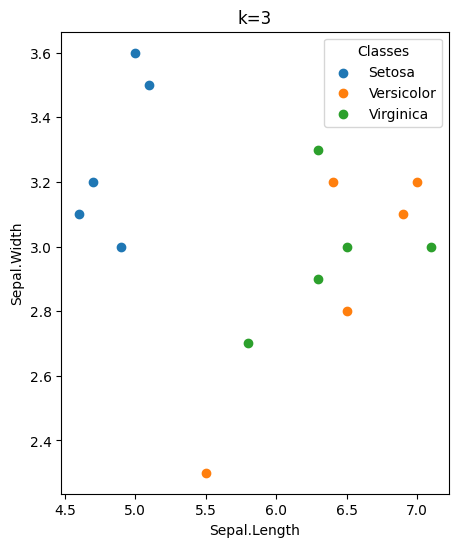

In [145]:
plt.figure(figsize=(5, 6))


plt.scatter(test_data[0][:, 0], test_data[0][:, 1], label=f'Setosa')
plt.scatter(test_data[1][:, 0], test_data[1][:, 1], label=f'Versicolor')
plt.scatter(test_data[2][:, 0], test_data[2][:, 1], label=f'Virginica')
plt.xlabel('Sepal.Length')
plt.ylabel('Sepal.Width')
plt.legend(title='Classes')

plt.title('k=3')
plt.show()

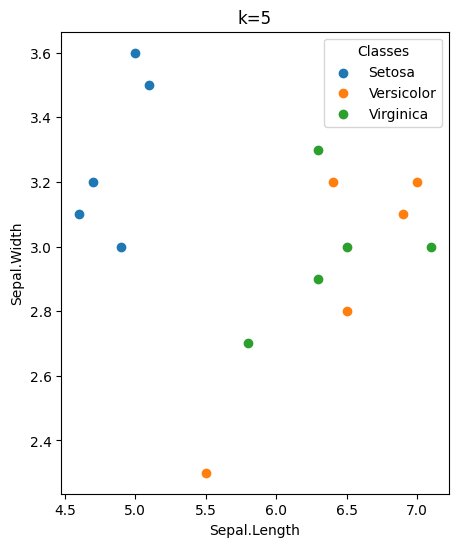

In [146]:
k = 5
predictions = []
for i in range(len(test_data)):
    predictions.extend(knn(train_data[i], train_labels[i], test_data[i], k))
plt.figure(figsize=(5, 6))

plt.scatter(test_data[0][:, 0], test_data[0][:, 1], label=f'Setosa')
plt.scatter(test_data[1][:, 0], test_data[1][:, 1], label=f'Versicolor')
plt.scatter(test_data[2][:, 0], test_data[2][:, 1], label=f'Virginica')
plt.xlabel('Sepal.Length')
plt.ylabel('Sepal.Width')
plt.legend(title='Classes')

plt.title('k=5')
plt.show()